**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

*   NOMBRE: 
*   MATRÍCULA: 

-Daniela Gómez Escamilla A01795312

-Francisco Antonio Enríquez Cabrera A01795006

-Juan Manuel Carballo Montaño A01166758

-Kurt Damián Yáñez Badelt A00394053

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import os
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 8/Actividad8_RLineal"
DIR = "../datasets"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline, make_pipeline

In [4]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe. 

In [5]:
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
insurance_df.describe(include="object").T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


1b) Búsqueda de valores faltantes.

In [7]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas. 

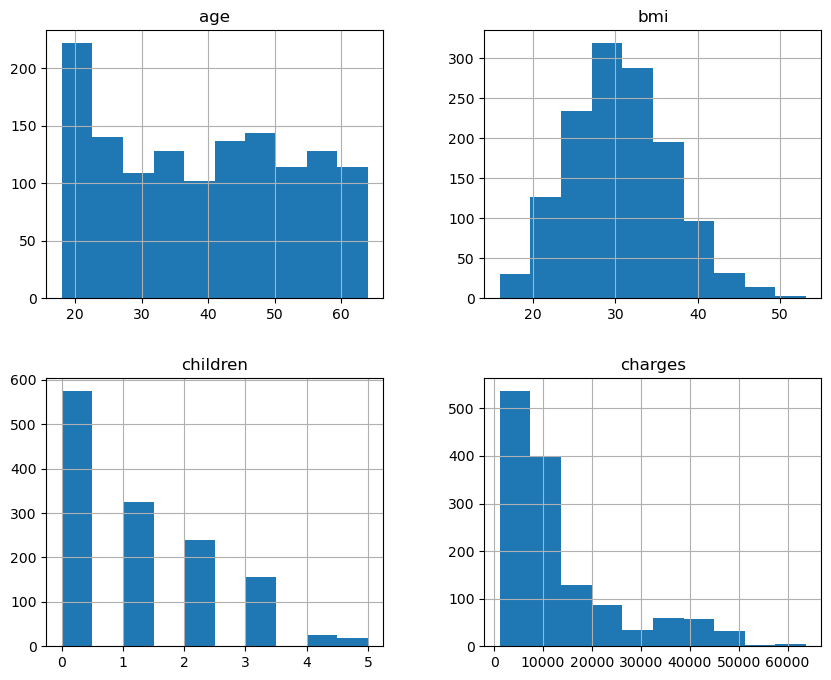

In [8]:
#histogram for all the numerical variables
insurance_df.hist(figsize=(10,8), bins=10)
plt.show()

<Axes: >

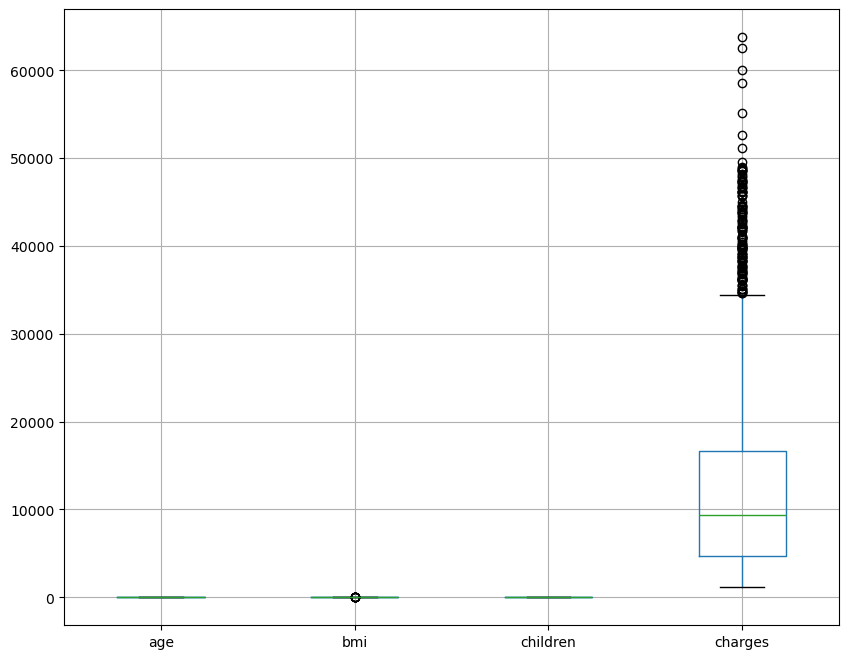

In [9]:
insurance_df.boxplot(figsize=(10,8))

c:\Users\jmcar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jmcar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jmcar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


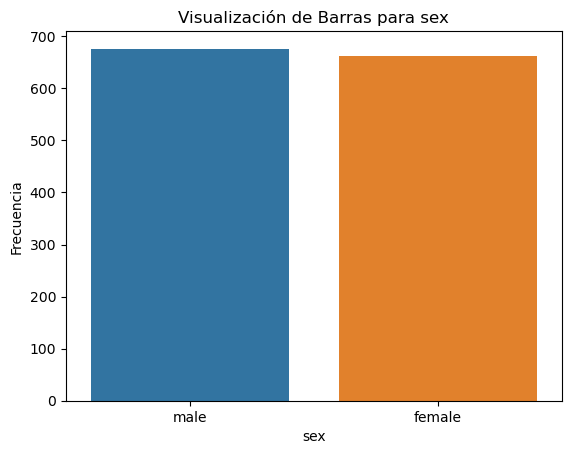

c:\Users\jmcar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jmcar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jmcar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


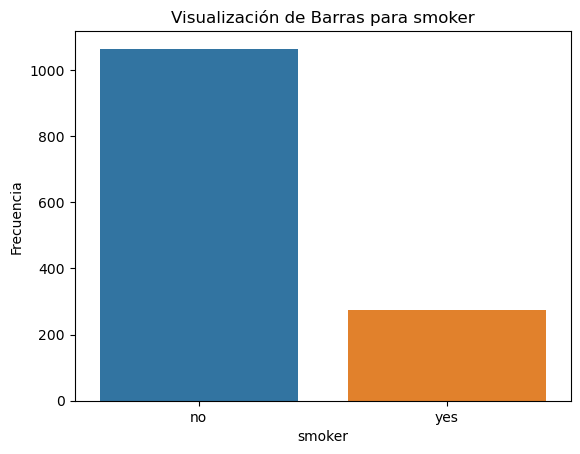

c:\Users\jmcar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jmcar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jmcar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


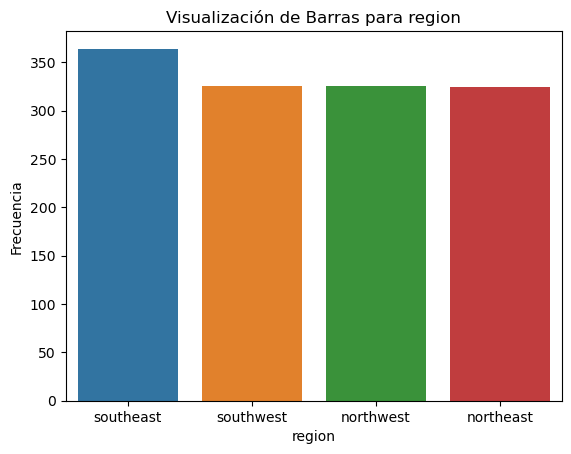

In [10]:
columnas_categoricas = insurance_df.select_dtypes(include=['object', 'category']).columns

for column in columnas_categoricas:
    
    count = insurance_df[column].value_counts()
    
    sns.barplot(x=count.index, y=count.values)
    plt.ylabel('Frecuencia')
    plt.xlabel(column)
    plt.title(f'Visualización de Barras para {column}')
    
    plt.show()

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot. 

c:\Users\jmcar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jmcar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jmcar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='charges', ylabel='sex'>

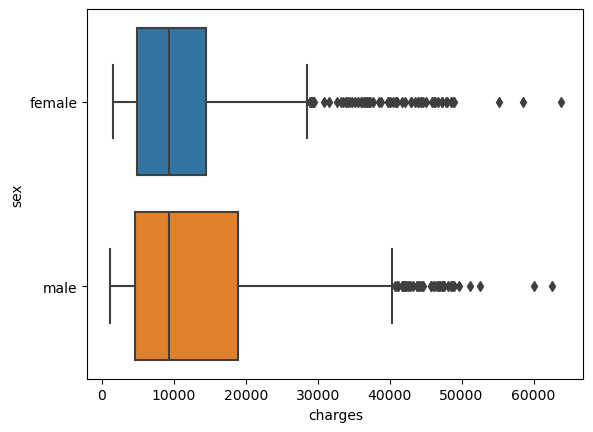

In [11]:
sns.boxplot(insurance_df, x='charges', y='sex')

La media pareciera ser similar, sin embargo la distribución en el caso de los hombres es más amplia, en ambos casos existe un numero significativo de outliers, sin embargo el grupo de outliers para las mujeres tiene una mayor dispersión.
El bigote derecho en el caso de los hombres se extiende mucho más lo cual indica un rango más amplio

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico? 

c:\Users\jmcar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jmcar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jmcar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jmcar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

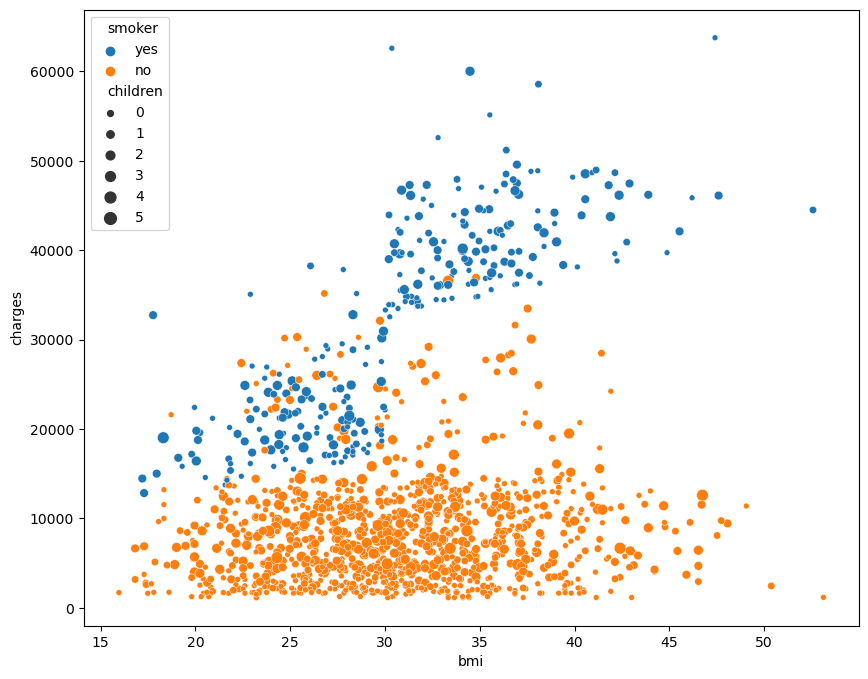

In [12]:

plt.figure(figsize=(10,8))
sns.scatterplot(insurance_df, x='bmi', y='charges', size='children', hue='smoker')
plt.show()

Fumar y tener un BMI alto parecieran ser predictores importantes para el pago de primas más altas, sin embargo el número de hijos no parece tener mayor influencia.

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas. 

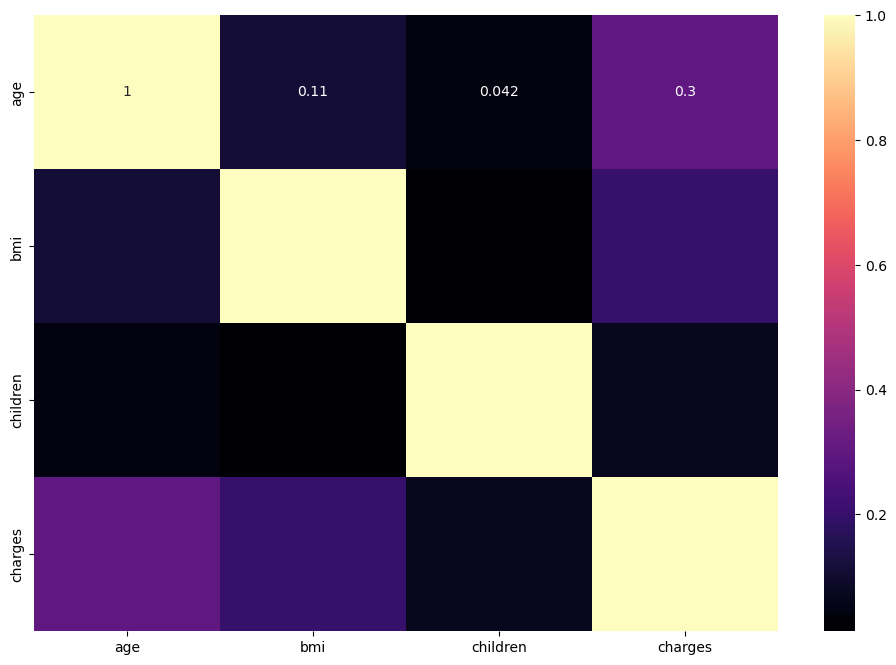

In [13]:
#Correlation heatmap of numeric columns
plt.figure(figsize=(12,8))
sns.heatmap(insurance_df.select_dtypes(include=['number']).corr(), annot=True, cmap='magma')
plt.show()

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`. 

3a) ¿Cuál es el promedio de `age` y de `bmi`? 

In [14]:
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)
IQR = Q3 - Q1


lim_inferior = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR


outliers_df = insurance_df[
    (insurance_df['charges'] < lim_inferior) | 
    (insurance_df['charges'] > lim_sup)
]

print("Promedio de edad de los outlayers",outliers_df["age"].mean())
print("Promedio de bmi de los outlayers",outliers_df["bmi"].mean())

Promedio de edad de los outlayers 41.07913669064748
Promedio de bmi de los outlayers 35.564604316546756


3b) ¿Qué porcentaje de estas observaciones se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores? 

In [15]:
num_total = len(outliers_df)
num_women = len(outliers_df[outliers_df['sex'] == 'female'])
num_men = num_total - num_women

percent_women = (num_women / num_total) * 100
percent_men = (num_men / num_total) * 100

num_smokers = len(outliers_df[outliers_df['smoker'] == 'yes'])
num_non_smokers = num_total - num_smokers

percent_smokers = (num_smokers / num_total) * 100
percent_non_smokers = (num_non_smokers / num_total) * 100

print("Porcentaje Mujeres",percent_women)
print("Porcentaje Hombres",percent_men)
print("Porcentaje Fumadores",percent_smokers)
print("Porcentaje No Fumadores",percent_non_smokers)


Porcentaje Mujeres 35.97122302158273
Porcentaje Hombres 64.02877697841727
Porcentaje Fumadores 97.84172661870504
Porcentaje No Fumadores 2.158273381294964


# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`). 

In [16]:
X = insurance_df.drop(['charges'], axis=1)
y = insurance_df['charges']
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1338 non-null   float64
dtypes: float64(1)
memory usage: 10.6 KB


(None, None)

5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción. 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.20,  
    random_state=1,  
    stratify=X['smoker']  
)

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [18]:
numerical_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()



preprocessing = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)


print("Preprocessing: ",preprocessing)


Preprocessing:  ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['sex', 'smoker', 'region'])])


# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`. 

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [19]:
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessing),
                              ('regressor', LinearRegression())])

def fit_pred(X_train, y_train, X_test, y_test, pipeline):
    # Entrenamiento del modelo
    model = pipeline.fit(X_train, y_train)

    # Predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Cálculo de métricas
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print(f"RMSE: {rmse} \n  r2: {r2}")
    
    return model
    

lr_model = fit_pred(X_train, y_train, X_test, y_test, lr_pipeline)

RMSE: 5698.759784532356 
  r2: 0.7538547215244324


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`. 


In [20]:
def high_boundary(df):
    Q2 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    iqr = Q3 - Q2
    upper_limit = Q3 + 1.5 * iqr

    return upper_limit

In [21]:
def replace_max_outliers(df):
    boundary = high_boundary(df)
    return np.where(df > boundary, boundary, df)

[Text(1, 0, 'y_train'),
 Text(2, 0, 'y_train_bounded'),
 Text(3, 0, 'y_test'),
 Text(4, 0, 'y_test_bounded')]

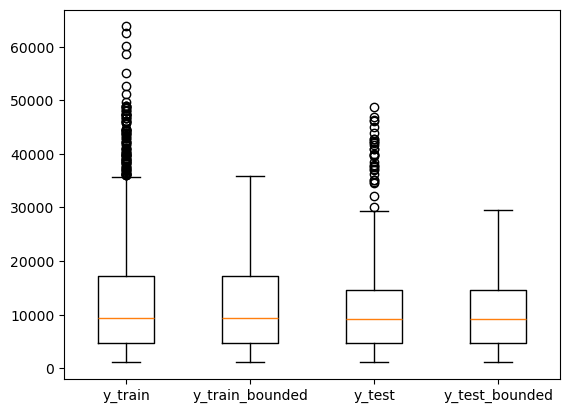

In [22]:
y_train_bounded = replace_max_outliers(y_train)
y_test_bounded = replace_max_outliers(y_test)

ys = {
    'y_train': y_train,
    'y_train_bounded': y_train_bounded,
    'y_test': y_test,
    'y_test_bounded': y_test_bounded
}


fig, ax = plt.subplots()
ax.boxplot(ys.values())
ax.set_xticklabels(ys.keys())

In [23]:
lr_model2 = fit_pred(X_train, y_train_bounded, X_test, y_test_bounded, lr_pipeline)

RMSE: 4483.283878180579 
  r2: 0.7347946920346691


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`. 

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [24]:
preprocessing2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OrdinalEncoder(), categorical_features)
    ]
)

lr_pipeline2 = make_pipeline(preprocessing2, LinearRegression())

lr_pipeline2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linearregression', LinearRegression())])

In [25]:
y_train_bounded = replace_max_outliers(y_train)
y_test_bounded = replace_max_outliers(y_test)

lr_model3 = fit_pred(X_train, y_train_bounded, X_test, y_test_bounded, lr_pipeline2)

RMSE: 4479.05294898494 
  r2: 0.73529501075536


10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [26]:
d = 2
poly = PolynomialFeatures(degree=d, include_bias=False)

lr_pipeline3 = make_pipeline(preprocessing2, poly, LinearRegression())

y_train_bounded = replace_max_outliers(y_train)
y_test_bounded = replace_max_outliers(y_test)

print(f"Degree: {d}")
lr_model4 = fit_pred(X_train, y_train_bounded, X_test, y_test_bounded, lr_pipeline3)

Degree: 2
RMSE: 4177.265208721688 
  r2: 0.7697636816631481
